# Capstone Project
___

## Exploratory Data Analysis

First, let's import our Python packages.

In [15]:
# Importing Python packages:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Let's first start with importing our dataset file.

In [16]:
# Loading the file as dataframe
df_raw = pd.read_csv('data/vehicles.csv')

Now, let's explore our data.

#### 1.1. What is the shape of the dataset?

In [17]:
df_raw.shape

(539759, 25)

As we can see, our dataset consist of 539,759 rows and 25 columns. Let's see what each row actually represent.

In [18]:
df_raw.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7088746062,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,10299,2012.0,acura,tl,NaN,NaN,...,NaN,NaN,other,blue,https://images.craigslist.org/01414_3LIXs9EO33...,2012 Acura TL Base 4dr Sedan Offered by: B...,NaN,nc,35.7636,-78.7443
1,7088745301,https://greensboro.craigslist.org/ctd/d/bmw-3-...,greensboro,https://greensboro.craigslist.org,0,2011.0,bmw,335,NaN,6 cylinders,...,rwd,NaN,convertible,blue,https://images.craigslist.org/00S0S_1kTatLGLxB...,BMW 3 Series 335i Convertible Navigation Dakot...,NaN,nc,NaN,NaN
2,7088744126,https://greensboro.craigslist.org/cto/d/greens...,greensboro,https://greensboro.craigslist.org,9500,2011.0,jaguar,xf,excellent,NaN,...,NaN,NaN,NaN,blue,https://images.craigslist.org/00505_f22HGItCRp...,2011 jaguar XF premium - estate sale. Retired ...,NaN,nc,36.1032,-79.8794
3,7088743681,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,3995,2004.0,honda,element,NaN,NaN,...,fwd,NaN,SUV,orange,https://images.craigslist.org/00E0E_eAUnhFF86M...,2004 Honda Element LX 4dr SUV Offered by: ...,NaN,nc,35.7636,-78.7443
4,7074612539,https://lincoln.craigslist.org/ctd/d/gretna-20...,lincoln,https://lincoln.craigslist.org,41988,2016.0,chevrolet,silverado k2500hd,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00S0S_8msT7RQquO...,"Shop Indoors, Heated Showroom!!!www.gretnaauto...",NaN,ne,41.1345,-96.2458


It can be seen from above dataframe head, that each row represents each unique craigslist vehicle ad.

In [19]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539759 entries, 0 to 539758
Data columns (total 25 columns):
id              539759 non-null int64
url             539759 non-null object
region          539759 non-null object
region_url      539759 non-null object
price           539759 non-null int64
year            538772 non-null float64
manufacturer    516175 non-null object
model           531746 non-null object
condition       303707 non-null object
cylinders       321264 non-null object
fuel            536366 non-null object
odometer        440783 non-null float64
title_status    536819 non-null object
transmission    535786 non-null object
vin             315349 non-null object
drive           383987 non-null object
size            168550 non-null object
type            392290 non-null object
paint_color     365520 non-null object
image_url       539740 non-null object
description     539738 non-null object
county          0 non-null float64
state           539759 non-null obj

We can see that `county` column is actually a null column, no data is in it. So, let's remove it. But first, let's create a working copy of our raw dataframe.

In [20]:
# Creating a copy of the raw dataframe:
df_work1 = df_raw.copy()

df_work1 = df_work1.drop(['county'], axis=1)
df_work1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539759 entries, 0 to 539758
Data columns (total 24 columns):
id              539759 non-null int64
url             539759 non-null object
region          539759 non-null object
region_url      539759 non-null object
price           539759 non-null int64
year            538772 non-null float64
manufacturer    516175 non-null object
model           531746 non-null object
condition       303707 non-null object
cylinders       321264 non-null object
fuel            536366 non-null object
odometer        440783 non-null float64
title_status    536819 non-null object
transmission    535786 non-null object
vin             315349 non-null object
drive           383987 non-null object
size            168550 non-null object
type            392290 non-null object
paint_color     365520 non-null object
image_url       539740 non-null object
description     539738 non-null object
state           539759 non-null object
lat             530785 non-null

In [21]:
# Let's see number of duplicate rows we have:
df_work1.duplicated().sum()

0

We can see that we don't have any duplicated rows. But is that really the case? Let's actually remove some unique columns (`id`,  `url`, `region_url`, `image_url`), which we won't be using for our model, as they probably won't make any useful impact on our model, but would take our computational capability. After dropping those, let's then check if we still have no duplicated rows.

In [22]:
# Dropping unnecessary columns:
df_work1 = df_work1.drop(['id',
                          'url', 
                          'region_url',
                          'image_url'], axis=1)

# Let's see number of duplicate rows we have:
df_work1.duplicated().sum()

37043

Now, as we can see, we have actually some duplicated rows. These were probably same ads posted few times. Let's remove them.

In [25]:
# Let's drop duplicate rows:
df_work1 = df_work1.drop_duplicates()

# Let's see number of duplicate rows we have:
df_work1.duplicated().sum()

0

In [26]:
df_work1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502716 entries, 0 to 539758
Data columns (total 20 columns):
region          502716 non-null object
price           502716 non-null int64
year            501764 non-null float64
manufacturer    481335 non-null object
model           495471 non-null object
condition       283533 non-null object
cylinders       300806 non-null object
fuel            499504 non-null object
odometer        415131 non-null float64
title_status    500059 non-null object
transmission    498747 non-null object
vin             298110 non-null object
drive           360334 non-null object
size            158068 non-null object
type            370108 non-null object
paint_color     344528 non-null object
description     502695 non-null object
state           502716 non-null object
lat             494033 non-null float64
long            494033 non-null float64
dtypes: float64(4), int64(1), object(15)
memory usage: 80.5+ MB


We also don't really need the `vin` column, for the same reason as it this feature won't make much of a useful impact on our model. Additionally, we would also exclude `lat` and `long` columns, as we will be using `state` column instead. Also, the `description` column will not be included for now, as it's a separate NLP problem, which is out of the scope of our project for now. So, let's drop those too. 

In [27]:
# Dropping unnecessary columns (dropping lat/long, instead using state and region):
df_work2 = df_work1.drop(['vin', 'description', 'lat', 'long'], axis=1)
df_work2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502716 entries, 0 to 539758
Data columns (total 16 columns):
region          502716 non-null object
price           502716 non-null int64
year            501764 non-null float64
manufacturer    481335 non-null object
model           495471 non-null object
condition       283533 non-null object
cylinders       300806 non-null object
fuel            499504 non-null object
odometer        415131 non-null float64
title_status    500059 non-null object
transmission    498747 non-null object
drive           360334 non-null object
size            158068 non-null object
type            370108 non-null object
paint_color     344528 non-null object
state           502716 non-null object
dtypes: float64(2), int64(1), object(13)
memory usage: 65.2+ MB


In [28]:
# Now using lat/long instead state and region:
df_work_lat = df_work1.drop(['vin', 'description', 'region', 'state'], axis=1)
df_work_lat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 502716 entries, 0 to 539758
Data columns (total 16 columns):
price           502716 non-null int64
year            501764 non-null float64
manufacturer    481335 non-null object
model           495471 non-null object
condition       283533 non-null object
cylinders       300806 non-null object
fuel            499504 non-null object
odometer        415131 non-null float64
title_status    500059 non-null object
transmission    498747 non-null object
drive           360334 non-null object
size            158068 non-null object
type            370108 non-null object
paint_color     344528 non-null object
lat             494033 non-null float64
long            494033 non-null float64
dtypes: float64(4), int64(1), object(11)
memory usage: 65.2+ MB


Having some knowledge about cars, we know that it's extremely unlikely that someone would sell a car for \\$0 or very small amount. Also, some of the ads would include car parts wrongly posted in the car sales section. So, to be avoid having wrong data in our dataset, let's look at and remove rows with a price of \\$0 to \\$500, and also price of more than \\$100,000, as those would be outliers.

In [29]:
# Looking at how many cars are advertised at the price of $500 or less, and $100,000 or more:
print('Number of rows with a price of $500 or less =', df_work2['price'][df_work2['price'] <= 500.0].count())
print('Number of rows with a price of $100,000 or more =', df_work2['price'][df_work2['price'] >= 100000.0].count())

Number of rows with a price of $500 or less = 49617
Number of rows with a price of $100,000 or more = 490


We can see that 49,617 cars were advertised at the price of \\$500 or less, and 490 cars were advertised at the price of \\$100,000 or more.

In [30]:
# Let's now drop those:
df_work2.drop(df_work2.loc[df_work2['price']<=500].index, inplace=True)
df_work2.drop(df_work2.loc[df_work2['price']>=100000].index, inplace=True)

In [31]:
# Let's now drop those:
df_work_lat.drop(df_work_lat.loc[df_work_lat['price']<=500].index, inplace=True)
df_work_lat.drop(df_work_lat.loc[df_work_lat['price']>=100000].index, inplace=True)

In [14]:
# Double check if the values were dropped:
print('Number of rows with a price of $500 or less =', df_work2['price'][df_work2['price'] <= 500.0].count())
print('Number of rows with a price of $100,000 or more =', df_work2['price'][df_work2['price'] >= 100000.0].count())

Number of rows with a price of $500 or less = 0
Number of rows with a price of $100,000 or more = 0


In [32]:
# Double check if the values were dropped:
print('Number of rows with a price of $500 or less =', df_work_lat['price'][df_work_lat['price'] <= 500.0].count())
print('Number of rows with a price of $100,000 or more =', df_work_lat['price'][df_work_lat['price'] >= 100000.0].count())

Number of rows with a price of $500 or less = 0
Number of rows with a price of $100,000 or more = 0


In [15]:
df_work2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452609 entries, 0 to 539758
Data columns (total 16 columns):
region          452609 non-null object
price           452609 non-null int64
year            451718 non-null float64
manufacturer    433957 non-null object
model           446283 non-null object
condition       264736 non-null object
cylinders       274168 non-null object
fuel            449682 non-null object
odometer        375651 non-null float64
title_status    450277 non-null object
transmission    449246 non-null object
drive           324109 non-null object
size            143230 non-null object
type            331591 non-null object
paint_color     311901 non-null object
state           452609 non-null object
dtypes: float64(2), int64(1), object(13)
memory usage: 58.7+ MB


Let's further explore our data.

In [16]:
# Let's see how many unique values each of the columns have:
df_work2.nunique(axis=0)

region             403
price            17677
year               111
manufacturer        43
model            34924
condition            6
cylinders            8
fuel                 5
odometer        114943
title_status         6
transmission         3
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

We can see that number of unique years are 111. Let's actually explore our year column.

In [17]:
df_work2.describe()

,price,year,odometer
count,452609.000000,451718.000000,3.756510e+05
mean,14003.309967,2009.489956,1.026519e+05
std,11048.177835,9.433785,1.866519e+05
min,503.000000,0.000000,0.000000e+00
25%,5900.000000,2006.000000,4.856900e+04
50%,10999.000000,2011.000000,9.500000e+04
75%,18999.000000,2015.000000,1.399575e+05
max,99995.000000,2021.000000,6.480922e+07


We can see from here that the min value for our `year` column is 0, and the max value is 2021. These are not realistic values. Let's now actually see unique years in our dataset.

In [18]:
print(sorted(df_work2['year'].unique(), reverse=True))

[2019.0, 2018.0, 2017.0, 2016.0, 2015.0, 2014.0, 2013.0, 2012.0, 2011.0, 2010.0, 2009.0, 2008.0, 2007.0, 2006.0, 2005.0, 2004.0, 2003.0, 2002.0, 2001.0, 2000.0, 1999.0, 1998.0, 1997.0, 1996.0, 1995.0, 1994.0, 1993.0, 1992.0, 1991.0, 1990.0, 1989.0, 1988.0, 1987.0, 1986.0, 1985.0, 1984.0, 1983.0, 1981.0, 1980.0, 1979.0, 1977.0, 1975.0, 1974.0, 1973.0, 1972.0, 1971.0, 1970.0, 1968.0, 1967.0, 1966.0, 1964.0, 1951.0, 1950.0, 1949.0, 1942.0, 1929.0, nan, 2021.0, 2020.0, 1982.0, 1978.0, 1976.0, 1969.0, 1965.0, 1963.0, 1962.0, 1961.0, 1960.0, 1959.0, 1958.0, 1957.0, 1956.0, 1955.0, 1954.0, 1953.0, 1952.0, 1948.0, 1947.0, 1946.0, 1945.0, 1943.0, 1941.0, 1940.0, 1939.0, 1938.0, 1937.0, 1936.0, 1935.0, 1934.0, 1933.0, 1932.0, 1931.0, 1930.0, 1928.0, 1927.0, 1926.0, 1925.0, 1924.0, 1923.0, 1922.0, 1919.0, 1918.0, 1917.0, 1916.0, 1915.0, 1914.0, 1913.0, 1912.0, 1909.0, 1908.0, 1900.0, 0.0]


We can see that we have some NAN values too. Let's see how many we have.

In [19]:
df_work2.isnull().sum()

region               0
price                0
year               891
manufacturer     18652
model             6326
condition       187873
cylinders       178441
fuel              2927
odometer         76958
title_status      2332
transmission      3363
drive           128500
size            309379
type            121018
paint_color     140708
state                0
dtype: int64

We have only 891 null values out of total 452,609 in our year column. That's 0.2%. Let's drop those null values.

In [34]:
df_work2.dropna(subset=['year'], inplace=True)
df_work2.isnull().sum()

region               0
price                0
year                 0
manufacturer     17762
model             6307
condition       186982
cylinders       178420
fuel              2662
odometer         76939
title_status      1990
transmission      3344
drive           128386
size            308488
type            120923
paint_color     140619
state                0
dtype: int64

In [33]:
df_work_lat.dropna(subset=['year'], inplace=True)
df_work_lat.isnull().sum()

price                0
year                 0
manufacturer     17762
model             6307
condition       186982
cylinders       178420
fuel              2662
odometer         76939
title_status      1990
transmission      3344
drive           128386
size            308488
type            120923
paint_color     140619
lat               3746
long              3746
dtype: int64

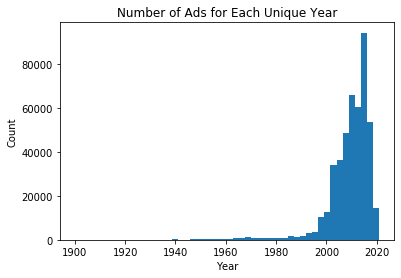

In [39]:
# Histogram of the years distribution.
plt.figure()
plt.hist(df_work2['year'], range=(1900,2021), bins=50)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of Ads for Each Unique Year')
plt.show()

From the histogram above we can see that there were very few cars older than year of 1950 advertised. Let's exclude those outliers from our project scope.   

In [22]:
# Let's now grab only years starting from 1950 and till current year of 2020.
df_work2 = df_work2[df_work2['year'].between(1950, 2020)]

# Let's just double check our years:
df_work2.describe()

,price,year,odometer
count,450645.000000,450645.000000,3.744360e+05
mean,13956.043953,2009.661064,1.028683e+05
std,10996.054685,8.242734,1.867075e+05
min,503.000000,1950.000000,0.000000e+00
25%,5895.000000,2006.000000,4.900000e+04
50%,10995.000000,2011.000000,9.514500e+04
75%,18995.000000,2015.000000,1.400000e+05
max,99995.000000,2020.000000,6.480922e+07


In [40]:
# Let's now grab only years starting from 1950 and till current year of 2020.
df_work_lat = df_work_lat[df_work_lat['year'].between(1950, 2020)]

# Let's just double check our years:
df_work_lat.describe()

,price,year,odometer,lat,long
count,450645.000000,450645.000000,3.744360e+05,446908.000000,446908.000000
mean,13956.043953,2009.661064,1.028683e+05,38.453736,-93.794010
std,10996.054685,8.242734,1.867075e+05,5.894294,17.453389
min,503.000000,1950.000000,0.000000e+00,-84.911400,-176.810000
25%,5895.000000,2006.000000,4.900000e+04,34.226200,-106.366000
50%,10995.000000,2011.000000,9.514500e+04,39.123400,-87.971500
75%,18995.000000,2015.000000,1.400000e+05,42.458200,-81.179600
max,99995.000000,2020.000000,6.480922e+07,84.514800,161.016000


From the above chart we can also see that our odometer column has some outliers too, with a min of 0 mileage, and max of really high values. For our project scope, we will use realistic mileages of 50 to 300,000 odometer values.

In [23]:
# Let's now filter out odometer values from 50 to 300,000.
df_work2 = df_work2[df_work2['odometer'].between(50, 300000)]

# Let's just double check our years:
df_work2.describe()

,price,year,odometer
count,369238.000000,369238.000000,369238.000000
mean,14668.840905,2010.643723,98906.250567
std,10870.472386,6.832618,59217.324925
min,503.000000,1950.000000,50.000000
25%,6495.000000,2007.000000,49500.000000
50%,12200.000000,2012.000000,95112.000000
75%,19988.000000,2015.000000,139012.750000
max,99995.000000,2020.000000,300000.000000


In [41]:
# Let's now filter out odometer values from 50 to 300,000.
df_work_lat = df_work_lat[df_work_lat['odometer'].between(50, 300000)]

# Let's just double check our years:
df_work_lat.describe()

,price,year,odometer,lat,long
count,369238.000000,369238.000000,369238.000000,366257.000000,366257.000000
mean,14668.840905,2010.643723,98906.250567,38.638958,-93.989800
std,10870.472386,6.832618,59217.324925,5.769686,17.677334
min,503.000000,1950.000000,50.000000,-84.911400,-170.288000
25%,6495.000000,2007.000000,49500.000000,34.436900,-108.455000
50%,12200.000000,2012.000000,95112.000000,39.292800,-87.885400
75%,19988.000000,2015.000000,139012.750000,42.504800,-81.177000
max,99995.000000,2020.000000,300000.000000,84.514800,161.016000


In [42]:
# First, let's check if we have rows with empty values, and replace those empty values with NaN values
df_work2 = df_work2.replace({'':np.nan})
df_work_lat = df_work_lat.replace({'':np.nan})

In [25]:
# Let's see what percentage of each column has missing values, and sort in descending order:
(np.mean(df_work2.isna()).sort_values(ascending = False))*100

size            66.320639
condition       38.080317
cylinders       34.921649
paint_color     24.209859
drive           21.025463
type            18.225914
manufacturer     2.974775
model            0.933003
transmission     0.857171
fuel             0.670029
title_status     0.518907
state            0.000000
odometer         0.000000
year             0.000000
price            0.000000
region           0.000000
dtype: float64

In [43]:
# Let's see what percentage of each column has missing values, and sort in descending order:
(np.mean(df_work_lat.isna()).sort_values(ascending = False))*100

size            66.320639
condition       38.080317
cylinders       34.921649
paint_color     24.209859
drive           21.025463
type            18.225914
manufacturer     2.974775
model            0.933003
transmission     0.857171
long             0.807338
lat              0.807338
fuel             0.670029
title_status     0.518907
odometer         0.000000
year             0.000000
price            0.000000
dtype: float64

Let's actually see what unique values each of our non-numeric columns have, and how many of those values are there. Let's see if some of those columns already contain values like 'other' or 'unknown', so instead of dropping null values or assigning some biased values, we would just assign null rows into those values.  

In [26]:
for i in df_work2.drop(['model'],axis = 1).select_dtypes(include = ['object']).columns:
    display(pd.DataFrame(df_work2[i].value_counts()))

,region
york,2794
fayetteville,2697
rochester,2627
fort collins / north CO,2566
tri-cities,2557
...,...
meadville,26
ogden-clearfield,13
houma,13
kansas city,4


,manufacturer
ford,67303
chevrolet,53408
toyota,28751
nissan,19851
ram,18395
honda,18291
jeep,17988
gmc,16526
dodge,12218
bmw,10961


,condition
excellent,103813
good,97640
like new,20614
fair,5657
new,524
salvage,383


,cylinders
6 cylinders,88654
8 cylinders,74276
4 cylinders,72569
5 cylinders,2189
10 cylinders,1393
other,654
3 cylinders,423
12 cylinders,136


,fuel
gas,322870
diesel,29067
other,10890
hybrid,3197
electric,740


,title_status
clean,351698
rebuilt,9122
salvage,3860
lien,2428
missing,160
parts only,54


,transmission
automatic,324653
manual,21139
other,20281


,drive
4wd,136205
fwd,102285
rwd,53114


,size
full-size,68292
mid-size,34487
compact,18502
sub-compact,3076


,type
sedan,73559
SUV,72237
pickup,44969
truck,36307
coupe,16908
other,14098
hatchback,12066
wagon,10052
van,8430
convertible,7072


,paint_color
white,72604
black,57484
silver,42262
blue,28447
red,27829
grey,26626
green,7068
custom,7033
brown,6215
yellow,1826


,state
ca,38366
fl,26088
tx,18416
mi,17154
ny,15064
oh,14071
pa,13565
or,13164
nc,12646
wa,12102


As we can see from above, our `fuel` column has 0.67% of missing values, and it also has 'other' values. Let's assign our null values to be 'other':

In [44]:
# Filling in missing values in 'fuel' column:
df_work2['fuel'].fillna('other', inplace=True)
df_work_lat['fuel'].fillna('other', inplace=True)

In [45]:
# Let's see what percentage of each column has missing values, and sort in descending order:
(np.mean(df_work2.isna()).sort_values(ascending = False))*100

size            68.292165
condition       41.393524
cylinders       39.498094
paint_color     31.129820
drive           28.421714
type            26.769577
odometer        17.032529
manufacturer     3.932099
model            1.396225
transmission     0.740285
title_status     0.440540
state            0.000000
fuel             0.000000
year             0.000000
price            0.000000
region           0.000000
dtype: float64

Same goes for `title_status` column which has label of 'missing'. Let's see the distribution and assign null values to be 'missing'.

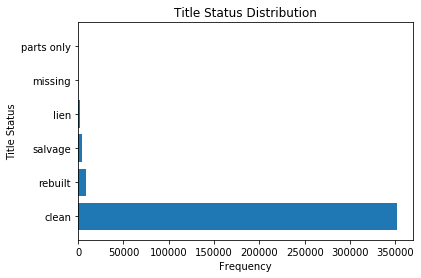

In [29]:
# See the distribution of unique values in the 'title_status' column:
plt.figure()
plt.barh(df_work2['title_status'].value_counts().index, 
         df_work2['title_status'].value_counts().values)
plt.title("Title Status Distribution")
plt.xlabel("Frequency")
plt.ylabel("Title Status")
plt.show()

In [46]:
# Filling in missing values in 'title_status' column:
df_work2['title_status'].fillna('missing', inplace=True)
df_work_lat['title_status'].fillna('missing', inplace=True)

# Double check what percentage of each column has missing values, and sort in descending order:
(np.mean(df_work2.isna()).sort_values(ascending = False))*100

size            68.292165
condition       41.393524
cylinders       39.498094
paint_color     31.129820
drive           28.421714
type            26.769577
odometer        17.032529
manufacturer     3.932099
model            1.396225
transmission     0.740285
state            0.000000
title_status     0.000000
fuel             0.000000
year             0.000000
price            0.000000
region           0.000000
dtype: float64

In [47]:
# Let's see what percentage of each column has missing values, and sort in descending order:
(np.mean(df_work_lat.isna()).sort_values(ascending = False))*100

size            66.320639
condition       38.080317
cylinders       34.921649
paint_color     24.209859
drive           21.025463
type            18.225914
manufacturer     2.974775
model            0.933003
transmission     0.857171
long             0.807338
lat              0.807338
title_status     0.000000
odometer         0.000000
fuel             0.000000
year             0.000000
price            0.000000
dtype: float64

Let's do same with other valid columns too.

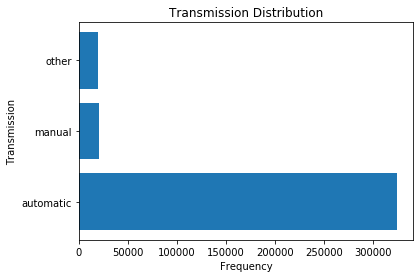

In [31]:
# See the distribution of unique values in the 'transmission' column:
plt.figure()
plt.barh(df_work2['transmission'].value_counts().index, 
         df_work2['transmission'].value_counts().values)
plt.title("Transmission Distribution")
plt.xlabel("Frequency")
plt.ylabel("Transmission")
plt.show()

In [48]:
# Filling in missing values in 'transmission' column:
df_work2['transmission'].fillna('other', inplace=True)
df_work_lat['transmission'].fillna('other', inplace=True)

# Double check what percentage of each column has missing values, and sort in descending order:
(np.mean(df_work2.isna()).sort_values(ascending = False))*100

size            68.292165
condition       41.393524
cylinders       39.498094
paint_color     31.129820
drive           28.421714
type            26.769577
odometer        17.032529
manufacturer     3.932099
model            1.396225
state            0.000000
transmission     0.000000
title_status     0.000000
fuel             0.000000
year             0.000000
price            0.000000
region           0.000000
dtype: float64

In [33]:
# Let's drop na values of 3% or less
#df_work2.dropna(subset=['manufacturer'], inplace=True)
#df_work2.dropna(subset=['model'], inplace=True)

# Double check what percentage of each column has missing values, and sort in descending order:
#(np.mean(df_work2.isna()).sort_values(ascending = False))*100

In [49]:
# Let's drop the column 'size', as it has more than 66% of missing values.
df_work2 = df_work2.drop(['size'], axis=1)
df_work_lat = df_work_lat.drop(['size'], axis=1)

# Double check what percentage of each column has missing values, and sort in descending order:
(np.mean(df_work2.isna()).sort_values(ascending = False))*100

condition       41.393524
cylinders       39.498094
paint_color     31.129820
drive           28.421714
type            26.769577
odometer        17.032529
manufacturer     3.932099
model            1.396225
state            0.000000
transmission     0.000000
title_status     0.000000
fuel             0.000000
year             0.000000
price            0.000000
region           0.000000
dtype: float64

Let's see the distribution of values in the remaining missing value columns. 

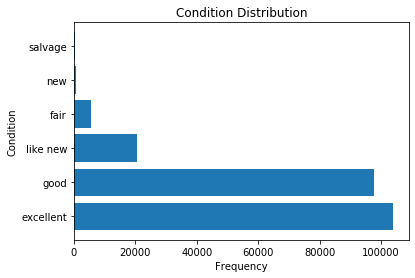

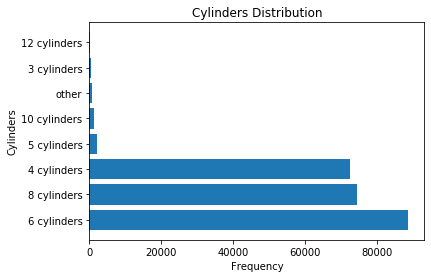

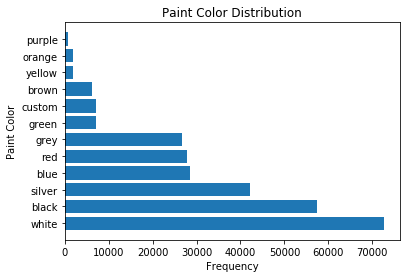

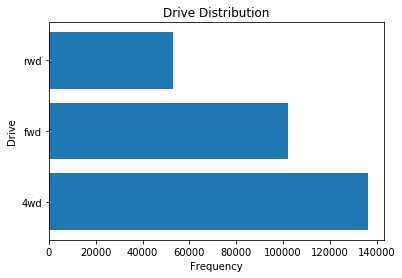

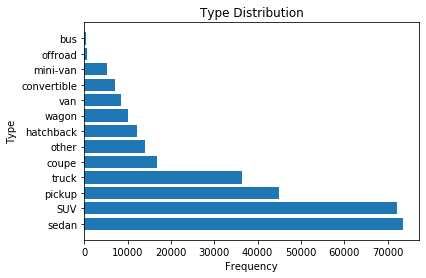

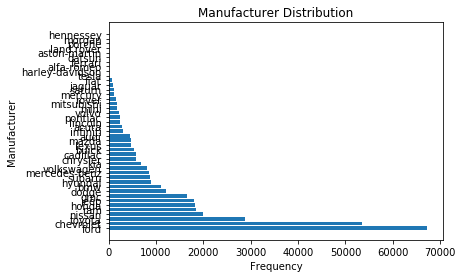

In [35]:
# See the distribution of unique values in the 'condition' column:
plt.figure()
plt.barh(df_work2['condition'].value_counts().index, 
         df_work2['condition'].value_counts().values)
plt.title("Condition Distribution")
plt.xlabel("Frequency")
plt.ylabel("Condition")
plt.show();

# See the distribution of unique values in the 'cylinders' column:
plt.figure()
plt.barh(df_work2['cylinders'].value_counts().index, 
         df_work2['cylinders'].value_counts().values)
plt.title("Cylinders Distribution")
plt.xlabel("Frequency")
plt.ylabel("Cylinders")
plt.show();

# See the distribution of unique values in the 'paint_color' column:
plt.figure()
plt.barh(df_work2['paint_color'].value_counts().index, 
         df_work2['paint_color'].value_counts().values)
plt.title("Paint Color Distribution")
plt.xlabel("Frequency")
plt.ylabel("Paint Color")
plt.show();

# See the distribution of unique values in the 'drive' column:
plt.figure()
plt.barh(df_work2['drive'].value_counts().index, 
         df_work2['drive'].value_counts().values)
plt.title("Drive Distribution")
plt.xlabel("Frequency")
plt.ylabel("Drive")
plt.show();

# See the distribution of unique values in the 'type' column:
plt.figure()
plt.barh(df_work2['type'].value_counts().index, 
         df_work2['type'].value_counts().values)
plt.title("Type Distribution")
plt.xlabel("Frequency")
plt.ylabel("Type")
plt.show();

# See the distribution of unique values in the 'manufacturer' column:
plt.figure()
plt.barh(df_work2['manufacturer'].value_counts().index, 
         df_work2['manufacturer'].value_counts().values)
plt.title("Manufacturer Distribution")
plt.xlabel("Frequency")
plt.ylabel("Manufacturer")
plt.show();

As we can see from the distribution charts above, we have few dominant values in each column, thus, assigning missing values as the most frequent value within the column would actually impose bias towards our model, especially when we the percentage of missing values is high (from 18% to 38%). Thus, it was decided to assign those missing values as a separate value. 

In [50]:
# Let's create a copy of our dataframe in case we will reprocess those missing values in a different way in the future:
df_work3 = df_work2.copy()

# Filling in missing values with new 'missing' name:
df_work3['condition'].fillna('missing', inplace=True)
df_work3['cylinders'].fillna('missing', inplace=True)
df_work3['paint_color'].fillna('missing', inplace=True)
df_work3['drive'].fillna('missing', inplace=True)
df_work3['type'].fillna('missing', inplace=True)
df_work3['manufacturer'].fillna('missing', inplace=True)
df_work3['model'].fillna('missing', inplace=True)

# Filling in missing values with new 'missing' name:
df_work_lat['condition'].fillna('missing', inplace=True)
df_work_lat['cylinders'].fillna('missing', inplace=True)
df_work_lat['paint_color'].fillna('missing', inplace=True)
df_work_lat['drive'].fillna('missing', inplace=True)
df_work_lat['type'].fillna('missing', inplace=True)
df_work_lat['manufacturer'].fillna('missing', inplace=True)
df_work_lat['model'].fillna('missing', inplace=True)

# Double check what percentage of each column has missing values, and sort in descending order:
(np.mean(df_work3.isna()).sort_values(ascending = False))*100

odometer        17.032529
state            0.000000
paint_color      0.000000
type             0.000000
drive            0.000000
transmission     0.000000
title_status     0.000000
fuel             0.000000
cylinders        0.000000
condition        0.000000
model            0.000000
manufacturer     0.000000
year             0.000000
price            0.000000
region           0.000000
dtype: float64

In [51]:
# Double check what percentage of each column has missing values, and sort in descending order:
(np.mean(df_work_lat.isna()).sort_values(ascending = False))*100

long            0.807338
lat             0.807338
paint_color     0.000000
type            0.000000
drive           0.000000
transmission    0.000000
title_status    0.000000
odometer        0.000000
fuel            0.000000
cylinders       0.000000
condition       0.000000
model           0.000000
manufacturer    0.000000
year            0.000000
price           0.000000
dtype: float64

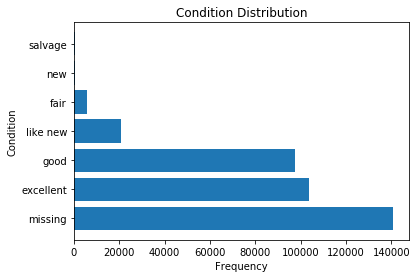

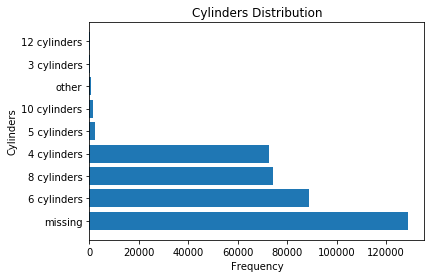

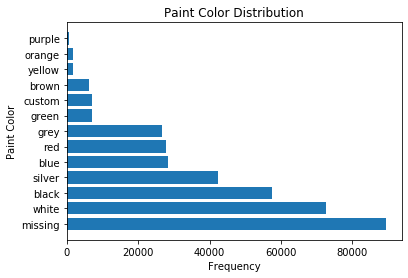

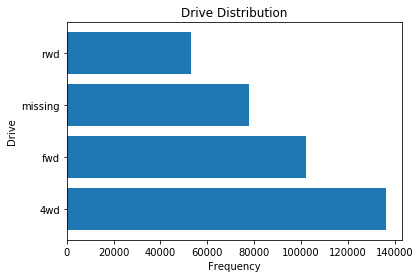

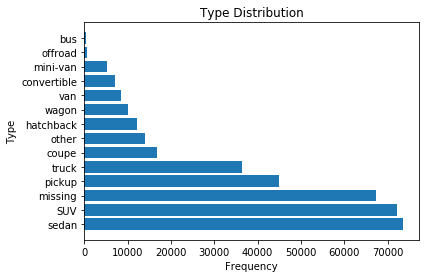

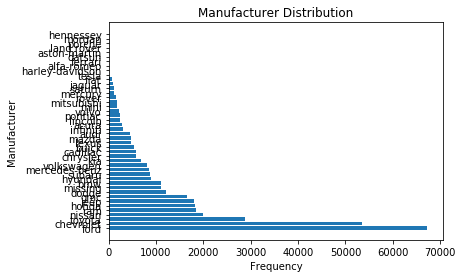

In [37]:
# See the distribution of unique values in the 'condition' column:
plt.figure()
plt.barh(df_work3['condition'].value_counts().index, 
         df_work3['condition'].value_counts().values)
plt.title("Condition Distribution")
plt.xlabel("Frequency")
plt.ylabel("Condition")
plt.show();

# See the distribution of unique values in the 'cylinders' column:
plt.figure()
plt.barh(df_work3['cylinders'].value_counts().index, 
         df_work3['cylinders'].value_counts().values)
plt.title("Cylinders Distribution")
plt.xlabel("Frequency")
plt.ylabel("Cylinders")
plt.show();

# See the distribution of unique values in the 'paint_color' column:
plt.figure()
plt.barh(df_work3['paint_color'].value_counts().index, 
         df_work3['paint_color'].value_counts().values)
plt.title("Paint Color Distribution")
plt.xlabel("Frequency")
plt.ylabel("Paint Color")
plt.show();

# See the distribution of unique values in the 'drive' column:
plt.figure()
plt.barh(df_work3['drive'].value_counts().index, 
         df_work3['drive'].value_counts().values)
plt.title("Drive Distribution")
plt.xlabel("Frequency")
plt.ylabel("Drive")
plt.show();

# See the distribution of unique values in the 'type' column:
plt.figure()
plt.barh(df_work3['type'].value_counts().index, 
         df_work3['type'].value_counts().values)
plt.title("Type Distribution")
plt.xlabel("Frequency")
plt.ylabel("Type")
plt.show();

# See the distribution of unique values in the 'manufacturer' column:
plt.figure()
plt.barh(df_work3['manufacturer'].value_counts().index, 
         df_work3['manufacturer'].value_counts().values)
plt.title("Manufacturer Distribution")
plt.xlabel("Frequency")
plt.ylabel("Manufacturer")
plt.show();

In [38]:
df_work3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369238 entries, 0 to 539758
Data columns (total 15 columns):
region          369238 non-null object
price           369238 non-null int64
year            369238 non-null float64
manufacturer    369238 non-null object
model           369238 non-null object
condition       369238 non-null object
cylinders       369238 non-null object
fuel            369238 non-null object
odometer        369238 non-null float64
title_status    369238 non-null object
transmission    369238 non-null object
drive           369238 non-null object
type            369238 non-null object
paint_color     369238 non-null object
state           369238 non-null object
dtypes: float64(2), int64(1), object(12)
memory usage: 45.1+ MB


In [39]:
# Let's see how many unique values each of the columns have:
df_work3.nunique(axis=0)

region             403
price            16639
year                71
manufacturer        44
model            28211
condition            7
cylinders            9
fuel                 5
odometer        113257
title_status         6
transmission         3
drive                4
type                14
paint_color         13
state               51
dtype: int64

We can see that we have 28,211 unique values in `model` column. Converting them into dummy variables would take too many columns and the limited computational ability. I decided to drop this column.

In [40]:
# Dropping 'model' column:
df_work4 = df_work3.drop(['model'], axis=1)
df_work4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369238 entries, 0 to 539758
Data columns (total 14 columns):
region          369238 non-null object
price           369238 non-null int64
year            369238 non-null float64
manufacturer    369238 non-null object
condition       369238 non-null object
cylinders       369238 non-null object
fuel            369238 non-null object
odometer        369238 non-null float64
title_status    369238 non-null object
transmission    369238 non-null object
drive           369238 non-null object
type            369238 non-null object
paint_color     369238 non-null object
state           369238 non-null object
dtypes: float64(2), int64(1), object(11)
memory usage: 42.3+ MB


In [52]:
# Dropping 'model' column:
df_work_lat = df_work_lat.drop(['model'], axis=1)
df_work_lat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369238 entries, 0 to 539758
Data columns (total 14 columns):
price           369238 non-null int64
year            369238 non-null float64
manufacturer    369238 non-null object
condition       369238 non-null object
cylinders       369238 non-null object
fuel            369238 non-null object
odometer        369238 non-null float64
title_status    369238 non-null object
transmission    369238 non-null object
drive           369238 non-null object
type            369238 non-null object
paint_color     369238 non-null object
lat             366257 non-null float64
long            366257 non-null float64
dtypes: float64(4), int64(1), object(9)
memory usage: 42.3+ MB


In [53]:
df_work_lat.dropna(subset=['lat'], inplace=True)
df_work_lat.dropna(subset=['long'], inplace=True)
df_work_lat.isnull().sum()

price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
lat             0
long            0
dtype: int64

In [41]:
# Let's now convert our categorical columns into dummy variables:
df_work5 = pd.get_dummies(df_work4)
print(df_work5.shape)
df_work5.head()

(369238, 562)


,price,year,odometer,region_SF bay area,region_abilene,region_akron / canton,region_albany,region_albuquerque,region_altoona-johnstown,region_amarillo,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,10299,2012.0,90186.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9500,2011.0,85000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3995,2004.0,212526.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,12995,2015.0,85127.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,10995,2014.0,112383.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# Let's now convert our categorical columns into dummy variables:
df_work_lat1 = pd.get_dummies(df_work_lat)
print(df_work_lat1.shape)
df_work_lat1.head()

(366257, 110)


,price,year,odometer,lat,long,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,...,paint_color_custom,paint_color_green,paint_color_grey,paint_color_missing,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,10299,2012.0,90186.0,35.7636,-78.7443,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9500,2011.0,85000.0,36.1032,-79.8794,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3995,2004.0,212526.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,12995,2015.0,85127.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,10995,2014.0,112383.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# Let's remove all the spaces within column names and make them all lowercase (in case if there are some uppercase letters):
df_work5.columns = df_work5.columns.str.replace(' ', '_')
df_work5.columns = map(str.lower, df_work5.columns)
df_work5.head()

,price,year,odometer,region_sf_bay_area,region_abilene,region_akron_/_canton,region_albany,region_albuquerque,region_altoona-johnstown,region_amarillo,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,10299,2012.0,90186.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9500,2011.0,85000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3995,2004.0,212526.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,12995,2015.0,85127.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,10995,2014.0,112383.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
# Let's remove all the spaces within column names and make them all lowercase (in case if there are some uppercase letters):
df_work_lat1.columns = df_work_lat1.columns.str.replace(' ', '_')
df_work_lat1.columns = map(str.lower, df_work_lat1.columns)
df_work_lat1.head()

,price,year,odometer,lat,long,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,...,paint_color_custom,paint_color_green,paint_color_grey,paint_color_missing,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,10299,2012.0,90186.0,35.7636,-78.7443,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9500,2011.0,85000.0,36.1032,-79.8794,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3995,2004.0,212526.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,12995,2015.0,85127.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,10995,2014.0,112383.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Resetting index:
df_work5 = df_work5.reset_index().drop(columns = ['index']).copy()
df_work5

,price,year,odometer,region_sf_bay_area,region_abilene,region_akron_/_canton,region_albany,region_albuquerque,region_altoona-johnstown,region_amarillo,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,10299,2012.0,90186.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9500,2011.0,85000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3995,2004.0,212526.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12995,2015.0,85127.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10995,2014.0,112383.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369233,12955,2015.0,74508.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
369234,13995,2016.0,97545.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
369235,10995,2010.0,80328.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
369236,6495,2015.0,83521.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
# Resetting index:
df_work_lat1 = df_work_lat1.reset_index().drop(columns = ['index']).copy()
df_work_lat1

,price,year,odometer,lat,long,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,...,paint_color_custom,paint_color_green,paint_color_grey,paint_color_missing,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,10299,2012.0,90186.0,35.7636,-78.7443,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9500,2011.0,85000.0,36.1032,-79.8794,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3995,2004.0,212526.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,12995,2015.0,85127.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,10995,2014.0,112383.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366252,12955,2015.0,74508.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
366253,13995,2016.0,97545.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
366254,10995,2010.0,80328.0,35.7636,-78.7443,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
366255,6495,2015.0,83521.0,35.7636,-78.7443,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [64]:
# Assigning data (X) and target (y) columns;
X = df_work5.loc[:, df_work5.columns != 'price']
y = df_work5['price']

print(X.shape)
print(y.shape)

(369238, 561)
(369238,)


In [59]:
# Assigning data (X) and target (y) columns;
X = df_work_lat1.loc[:, df_work_lat1.columns != 'price']
y = df_work_lat1['price']

print(X.shape)
print(y.shape)

(366257, 109)
(366257,)


In [60]:
# Let's now split the data into train and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [61]:
# Let's now scale the data:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
# Creating our model:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae

RF = RandomForestRegressor(random_state=1)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

In [62]:
# Accuracy check:
print("The mean absolute error of our model is: ", mae(y_test, y_pred))
print("The mean value of the price column is: ", df_work5['price'].mean())
print("The test set R2 of our model is: ", round(RF.score(X_test,y_test),4))

The mean absolute error of our model is:  1991.3935176699401
The mean value of the price column is:  14668.84090478228
The test set accuracy of our model is:  87.5 %


In [63]:
# Accuracy check:
print("The mean absolute error of our model is: ", mae(y_test, y_pred))
print("The mean value of the price column is: ", df_work_lat1['price'].mean())
print("The test set R2 of our model is: ", round(RF.score(X_test,y_test),4))

The mean absolute error of our model is:  1846.8591784139012
The mean value of the price column is:  14655.96683749389
The test set R2 of our model is:  0.8833


### Hyperparameter Optimization

Before processing our data onwards, let's actually divide our dataframe into remainder and test sets, so that we could use validation sets further:

In [73]:
# Let's split our dataframe into two sets, the remainder set (which will be train+validation combination) and test set:
df_remainder, df_test = train_test_split(df_work5, test_size=0.2, random_state=1)

print(df_remainder.shape)
print(df_test.shape)

(295390, 562)
(73848, 562)


In [74]:
# Let's actually create a subset of our dataframe, and see how different hyperparameters of RandomForestRegressor model affect our accuracy score:
df_RF_small = df_remainder.sample(frac=0.25, random_state=1)

# Assigning data (X) and target (y) columns;
X_small = df_RF_small.loc[:, df_RF_small.columns != 'price']
y_small = df_RF_small['price']

print(X_small.shape)
print(y_small.shape)

(73848, 561)
(73848,)


In [79]:
# Let's now split the data into train and validation sets:
X_train_RF, X_valid_RF, y_train_RF, y_valid_RF = train_test_split(X_small, y_small, test_size = 0.2, random_state=1)

In [80]:
# Let's now scale the data:

scaler = StandardScaler()
scaler.fit(X_train_RF)
X_train_RF = scaler.transform(X_train_RF)
X_valid_RF = scaler.transform(X_valid_RF)

In [ ]:
# Let's now run the RF model with different n_estimators values and see how our accuracy scores change:

train_scores = []
validation_scores = []

n_number = [10,20,30,40,50,60,70,80,90,100,120,140,160,180,200]

for n in n_number:
    
    myRF = RandomForestRegressor(n_estimators=n, random_state=1)
    myRF.fit(X_train_RF, y_train_RF)
    
    train_scores.append(myRF.score(X_train_RF, y_train_RF))
    validation_scores.append(myRF.score(X_valid_RF, y_valid_RF))
    
    print(f'Train set accuracy score with n_estimators={n}: {myRF.score(X_train_RF, y_train_RF)}')
    print(f'Validation set accuracy score with n_estimators={n}: {myRF.score(X_valid_RF, y_valid_RF)}')

Train set accuracy score with n_estimators=10: 0.9625859662906122
Validation set accuracy score with n_estimators=10: 0.7901140854748877
Train set accuracy score with n_estimators=20: 0.9680929081834708
Validation set accuracy score with n_estimators=20: 0.8006424981457181
Train set accuracy score with n_estimators=30: 0.9698897462332968
Validation set accuracy score with n_estimators=30: 0.8043940870301621
Train set accuracy score with n_estimators=40: 0.9709322783871694
Validation set accuracy score with n_estimators=40: 0.8053138237558184
Train set accuracy score with n_estimators=50: 0.971549449425986
Validation set accuracy score with n_estimators=50: 0.8063620538163737
Train set accuracy score with n_estimators=60: 0.9717725332755714
Validation set accuracy score with n_estimators=60: 0.8064611543709944
Train set accuracy score with n_estimators=70: 0.9720720020880332
Validation set accuracy score with n_estimators=70: 0.8065390844602529
Train set accuracy score with n_estimators

In [ ]:
#estimator_number = list(range(1, 500))

In [47]:
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_absolute_error as mae
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)
#model = RandomForestRegressor(random_state=1)
#model.fit(X_train, y_train)
#pred = model.predict(X_test)

In [48]:
#feat_importances = pd.Series(model.feature_importances_, index=X_head.columns)
#feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [49]:
#Impute the values using scikit-learn SimpleImpute Class

#from sklearn.impute import SimpleImputer
#imp_mean = SimpleImputer(strategy='most_frequent')
#imp_mean.fit(df_work3)
#imputed_train_df = imp_mean.transform(df_work3)

In [50]:
#df_work3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,369238.0,14668.840905,10870.472386,503.0,6495.0,12200.0,19988.00,99995.0
year,369238.0,2010.643723,6.832618,1950.0,2007.0,2012.0,2015.00,2020.0
odometer,369238.0,98906.250567,59217.324925,50.0,49500.0,95112.0,139012.75,300000.0


In [51]:
#df_work2.describe(include=['object']).transpose()

,count,unique,top,freq
region,369238,403,york,2794
manufacturer,358254,43,ford,67303
model,365793,28210,f-150,8083
condition,228631,6,excellent,103813
cylinders,240294,8,6 cylinders,88654
fuel,369238,5,gas,322870
title_status,369238,6,clean,351698
transmission,369238,3,automatic,324653
drive,291604,3,4wd,136205
type,301941,13,sedan,73559


In [52]:
# Codes to use:



df_timesheet.dropna(inplace = True)

df_price.fillna(np.mean(df_price['Price']))

df_price[(df_price['Price'] > 55) & (np.isnan(df_price['Price']))] = df_price['Price'].mean()
df_price

NameError: name 'df_timesheet' is not defined

In [ ]:
# Some additional works to do:
# make prediction model just based on one particular state, California for ex


In [ ]:
# Grouping Reviewer_Score column by its values/scores
df_work1.groupby(['year']).size()

In [ ]:
# Let's view non-numeric columns in detail and see what do they store inside:

df_hotel.select_dtypes(include=object).head()

In [ ]:
# Create a smaller dataframe with 10% or random data from our original dataframe:

df_hotel_small = df_hotel.sample(frac=0.1, random_state=1)

In [ ]:
# Let's look into our dataframe information

df_hotel_small.info()

In [ ]:
# Let's plot the distribution of our data as histogram:

plt.figure()
plt.hist(df_hotel['Reviewer_Score'], bins=9)
plt.xlabel('Reviewer Score')
plt.ylabel('Count')
plt.title('Reviewer Score Distribution')
plt.show()

In [ ]:
df_hotel_small2 = df_hotel_small.copy()
df_hotel_small2['days_since_review'] = pd.to_numeric(df_hotel_small2['days_since_review'].str[:-4])
df_hotel_small2.head()

In [ ]:
# Now, let's assign data and target columns:

X = df_hotel_small4.iloc[:,:-1]
y = df_hotel_small4.iloc[:,-1]

In [ ]:
# Let's see how many of each class do we have in our target column:

y.value_counts()

In [ ]:
# A short look into our data columns:

X.info()

In [ ]:
# Creating a train/test split with 80% train, 20% test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)